In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, mannwhitneyu
import pandas as pd
import seaborn as sns

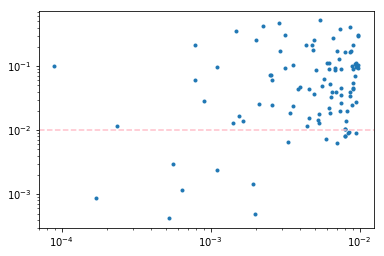

In [6]:
def test(nTestMax, pThr=0.01):
    x = []
    y = []
    for iTest in range(nTestMax):
        data = np.random.normal(0, 1, (4, 100))
        pA = wilcoxon(data[0], data[1])[1]
        pB = wilcoxon(data[2], data[3])[1]
        
        if (pA < pThr) and (pB >= 0.05):
            dataDiff1 = data[0] - data[1]
            dataDiff2 = data[2] - data[3]
            pC = wilcoxon(dataDiff1, dataDiff2)[1]
            x += [pA]
            y += [pC]
            
#             print('Zomm')
#             print(np.mean(data[0]), np.std(data[0]))
#             print(np.mean(data[1]), np.std(data[1]))
#             print(np.mean(data[2]), np.std(data[2]))
#             print(np.mean(data[3]), np.std(data[3]))
#             print(pA, pB, pC)
            
    plt.figure()
    plt.loglog(x, y, '.')
    plt.axhline(y=pThr, linestyle='--', color='pink')
    plt.show()
    
test(10000)

## Test_Yasir

In [3]:
tasks = ('AUD', 'TAC')
areas = ('A', 'RL')
perturbations = ('raw', 'opto')
keys = [(task, area, pert) for task in tasks for area in areas for pert in perturbations]
keys

[('AUD', 'A', 'raw'),
 ('AUD', 'A', 'opto'),
 ('AUD', 'RL', 'raw'),
 ('AUD', 'RL', 'opto'),
 ('TAC', 'A', 'raw'),
 ('TAC', 'A', 'opto'),
 ('TAC', 'RL', 'raw'),
 ('TAC', 'RL', 'opto')]

In [4]:
rez = pd.read_excel('/home/alyosha/Downloads/yasir_d_opto.xlsx')
rez = rez.drop([0,1,2,3,4,5,8,9,12,13,14,15,16,17,20,21])

dataList = []
for idx, row in rez.iterrows():
    data = list(row)
    data = [d for d in data if (type(d) == float) and (not np.isnan(d))]
    dataList += [np.array(data)]
    
dataDict = {k : v for k,v in zip(keys, dataList)}

[Text(0,0,"('AUD', 'A', 'raw')"),
 Text(0,0,"('AUD', 'A', 'opto')"),
 Text(0,0,"('AUD', 'RL', 'raw')"),
 Text(0,0,"('AUD', 'RL', 'opto')"),
 Text(0,0,"('TAC', 'A', 'raw')"),
 Text(0,0,"('TAC', 'A', 'opto')"),
 Text(0,0,"('TAC', 'RL', 'raw')"),
 Text(0,0,"('TAC', 'RL', 'opto')")]

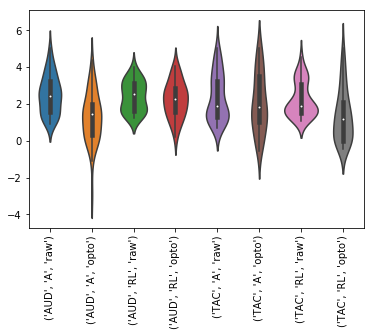

In [53]:
maxsize = max([a.size for a in dataDict.values()])
data_pad = {k:np.pad(v, pad_width=(0,maxsize-v.size,), mode='constant', constant_values=np.nan) for k,v in dataDict.items()}
df = pd.DataFrame(data_pad)

fig, ax = plt.subplots()
plot1 = sns.violinplot(data=df)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)

In [46]:
# Level 1 Tests
results = []
for task in tasks:
    for area in areas:
        dataA = dataDict[(task, area, "raw")]
        dataB = dataDict[(task, area, "opto")]
        pval = wilcoxon(dataA, dataB)[1]
        results += [[task, area, "raw vs opto", np.mean(dataA), np.mean(dataB), pval]]

pd.DataFrame(results, columns=("task", "area", "test", "mean(raw)", "mean(opto)", "pval"))

,task,area,test,mean(raw),mean(opto),pval
0,AUD,A,raw vs opto,2.513623,1.300464,1.864801e-09
1,AUD,RL,raw vs opto,2.406996,2.241792,9.777219e-02
2,TAC,A,raw vs opto,2.358385,2.069041,6.546641e-02
3,TAC,RL,raw vs opto,2.236581,1.386128,6.292151e-06


In [47]:
# Level 2 Tests
results = []
for task in tasks:
    dataTask = [dataDict[(task, area, "raw")] - dataDict[(task, area, "opto")] for area in areas]
    pVal = mannwhitneyu(dataTask[0], dataTask[1], alternative="two-sided")[1]
    results += [[task, "A vs RL", np.mean(dataTask[0]), np.mean(dataTask[1]), pVal]]
pd.DataFrame(results, columns=("task", "test", "mean(A)", "mean(RL)", "pval"))

,task,test,mean(A),mean(RL),pval
0,AUD,A vs RL,1.213159,0.165205,4.477231e-08
1,TAC,A vs RL,0.289344,0.850453,5.032025e-03
